# Statistical Analysis - Research Questions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway, ttest_ind, pearsonr, spearmanr, chi2_contingency
import warnings
warnings.filterwarnings('ignore')


In [2]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [3]:
kz_data = pd.read_csv('/Users/kassi/Data Mining/Final/Code/data/data_clean/kz_data_en_clean.csv')
foreign_data = pd.read_csv('/Users/kassi/Data Mining/Final/Code/data/data_clean/student_portuguese_clean.csv')

In [4]:
print("Data loaded successfully!")
print(f"Kazakhstan: {kz_data.shape}")
print(f"Foreign: {foreign_data.shape}")
print("\nColumns in Kazakhstan data:")
print(kz_data.columns.tolist())

Data loaded successfully!
Kazakhstan: (121, 125)
Foreign: (649, 74)

Columns in Kazakhstan data:
['university', 'course_year', 'age', 'gender', 'living_situation', 'family_size', 'mother_education', 'father_education', 'family_income', 'financial_support', 'emotional_support', 'travel_time', 'study_hours_weekly', 'extra_courses', 'academic_failures', 'class_absences', 'internet_access', 'study_space_comfort', 'has_computer', 'health_status', 'physical_activity', 'sleep_hours', 'nursery_school', 'romantic_relationship', 'alcohol_consumption', 'academic_stress', 'peer_support', 'gpa', 'employment_status', 'university_AIU', 'university_ATU', 'university_AUES🔛🔝', 'university_Abai Казахский национальный педагогический университет', 'university_Almaty Management University (AlmaU)', 'university_Astana International University ', 'university_Auezov', 'university_CAA', 'university_INTC', 'university_International IT University (IITU)', 'university_KIMEP University', 'university_Kazutb', 'unive

# RQ1: Course Level and GPA (Kazakhstan Only)

RQ1: HOW DOES COURSE LEVEL RELATE TO GPA?

Using column: course_year

GPA Statistics by course_year:
             Count   Mean    Std  Min   Max
course_year                                
1               13  2.621  1.530  0.0  4.00
2               20  3.168  0.429  2.2  3.80
3               22  2.804  0.595  1.6  3.80
4               59  3.276  0.501  1.5  4.00
5                2  3.250  0.354  3.0  3.50
Masters          5  3.310  0.545  2.5  3.93


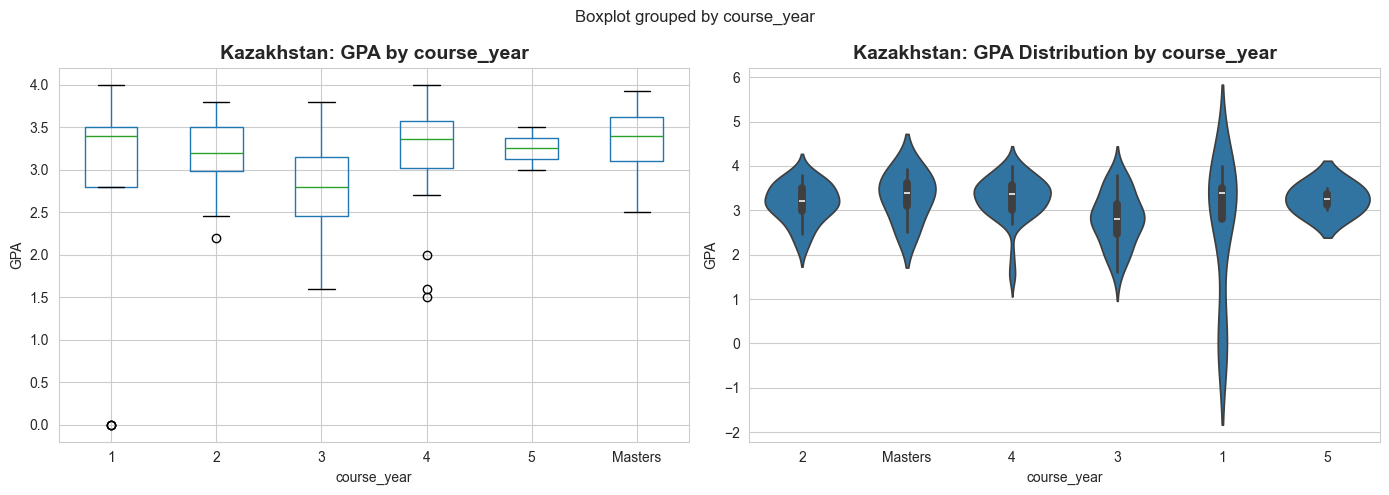


--- One-Way ANOVA Results ---
F-statistic: 2.9785
P-value: 0.0145

✓ CONCLUSION: Significant difference in GPA across course levels (p < 0.05)

✓ Results saved to: results/tables/rq1_course_level.csv


In [13]:
print("="*70)
print("RQ1: HOW DOES COURSE LEVEL RELATE TO GPA?")
print("="*70)

# Check if Course_Level or similar column exists
course_col = None
for col in kz_data.columns:
    if 'course' in col.lower() or 'level' in col.lower() or 'year' in col.lower():
        course_col = col
        break

if course_col and course_col in kz_data.columns:
    print(f"\nUsing column: {course_col}")
    
    # Descriptive statistics
    course_stats = kz_data.groupby(course_col)['gpa'].agg([
        ('Count', 'count'),
        ('Mean', 'mean'),
        ('Std', 'std'),
        ('Min', 'min'),
        ('Max', 'max')
    ]).round(3)
    
    print(f"\nGPA Statistics by {course_col}:")
    print(course_stats)
    
    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Box plot
    kz_data.boxplot(column='gpa', by=course_col, ax=axes[0])
    axes[0].set_title(f'Kazakhstan: GPA by {course_col}', fontsize=14, fontweight='bold')
    axes[0].set_xlabel(course_col)
    axes[0].set_ylabel('GPA')
    plt.sca(axes[0])
    plt.xticks(rotation=0)
    
    # Violin plot
    sns.violinplot(data=kz_data, x=course_col, y='gpa', ax=axes[1])
    axes[1].set_title(f'Kazakhstan: GPA Distribution by {course_col}', 
                      fontsize=14, fontweight='bold')
    axes[1].set_xlabel(course_col)
    axes[1].set_ylabel('GPA')
    
    plt.tight_layout()
    plt.savefig('/Users/kassi/Data Mining/Final/Code/figure/statistical/rq1_course_level_gpa.png', 
                dpi=300, bbox_inches='tight')
    plt.show()
    
    # ANOVA test
    course_levels = kz_data[course_col].unique()
    groups = [kz_data[kz_data[course_col] == level]['gpa'].dropna() 
              for level in course_levels]
    
    # Remove empty groups
    groups = [g for g in groups if len(g) > 0]
    
    if len(groups) >= 2:
        f_stat, p_value = f_oneway(*groups)
        
        print(f"\n--- One-Way ANOVA Results ---")
        print(f"F-statistic: {f_stat:.4f}")
        print(f"P-value: {p_value:.4f}")
        
        if p_value < 0.05:
            print("\n✓ CONCLUSION: Significant difference in GPA across course levels (p < 0.05)")
        else:
            print("\n✗ CONCLUSION: No significant difference in GPA across course levels (p >= 0.05)")
        
        # Save results
        rq1_results = pd.DataFrame({
            'Test': ['One-Way ANOVA'],
            'F_Statistic': [f_stat],
            'P_Value': [p_value],
            'Significant': [p_value < 0.05],
            'Interpretation': ['Significant difference' if p_value < 0.05 else 'No significant difference']
        })
        rq1_results.to_csv('/Users/kassi/Data Mining/Final/Code/report/statistical/rq1_course_level.csv', index=False)
        print("\n✓ Results saved to: results/tables/rq1_course_level.csv")
    else:
        print("\nInsufficient data for ANOVA test")
        
else:
    print(f"\n⚠ Course level column not found in Kazakhstan data")
    print("Creating placeholder results...")
    
    # Create placeholder
    rq1_results = pd.DataFrame({
        'Test': ['One-Way ANOVA'],
        'F_Statistic': [np.nan],
        'P_Value': [np.nan],
        'Significant': [False],
        'Interpretation': ['Column not found in dataset']
    })
    rq1_results.to_csv('/Users/kassi/Data Mining/Final/Code/report/statistical/rq1_course_level.csv', index=False)
    print("✓ Placeholder saved")

# RQ2: Gender Differences in Academic Performance

In [15]:
print("\n" + "="*70)
print("RQ2: ARE THERE GENDER DIFFERENCES IN ACADEMIC PERFORMANCE?")
print("="*70)

def analyze_gender_gpa_kz(data, name):
    """Analyze gender differences in GPA"""
    
    # Find gender column
    gender_col = None
    for col in data.columns:
        if 'gender' in col.lower() or 'sex' in col.lower():
            gender_col = col
            break
    
    if not gender_col:
        print(f"\n⚠ {name}: Gender column not found")
        return {
            'Dataset': name,
            'T_Statistic': np.nan,
            'P_Value': np.nan,
            'Significant': False,
            'Mean_Diff': np.nan,
            'Interpretation': 'Gender column not found'
        }
    
    print(f"\n--- {name} ---")
    print(f"Using column: {gender_col}")
    
    # Descriptive statistics
    gender_stats = data.groupby(gender_col)['gpa'].agg([
        ('Count', 'count'),
        ('Mean', 'mean'),
        ('Std', 'std'),
        ('Min', 'min'),
        ('Max', 'max')
    ]).round(3)
    
    print(f"\n{name} - GPA Statistics by Gender:")
    print(gender_stats)
    
    # T-test
    genders = data[gender_col].unique()
    if len(genders) == 2:
        group1 = data[data[gender_col] == genders[0]]['gpa'].dropna()
        group2 = data[data[gender_col] == genders[1]]['gpa'].dropna()
        
        if len(group1) > 0 and len(group2) > 0:
            t_stat, p_value = ttest_ind(group1, group2)
            mean_diff = abs(group1.mean() - group2.mean())
            
            print(f"\n--- Independent t-test Results ---")
            print(f"Group 1 ({genders[0]}): n={len(group1)}, Mean={group1.mean():.3f}")
            print(f"Group 2 ({genders[1]}): n={len(group2)}, Mean={group2.mean():.3f}")
            print(f"t-statistic: {t_stat:.4f}")
            print(f"P-value: {p_value:.4f}")
            print(f"Mean difference: {mean_diff:.3f}")
            
            if p_value < 0.05:
                print(f"\n✓ CONCLUSION: Significant gender difference in GPA (p < 0.05)")
            else:
                print(f"\n✗ CONCLUSION: No significant gender difference in GPA (p >= 0.05)")
            
            return {
                'Dataset': name,
                'T_Statistic': t_stat,
                'P_Value': p_value,
                'Significant': p_value < 0.05,
                'Mean_Diff': mean_diff,
                'Interpretation': 'Significant difference' if p_value < 0.05 else 'No significant difference'
            }
    
    return {
        'Dataset': name,
        'T_Statistic': np.nan,
        'P_Value': np.nan,
        'Significant': False,
        'Mean_Diff': np.nan,
        'Interpretation': 'Insufficient data for t-test'
    }
    
def analyze_gender_gpa_foreign(data, name):
    """Analyze gender differences in GPA"""
    
    # Find gender column
    gender_col = None
    for col in data.columns:
        if 'gender' in col.lower() or 'sex' in col.lower():
            gender_col = col
            break
    
    if not gender_col:
        print(f"\n⚠ {name}: Gender column not found")
        return {
            'Dataset': name,
            'T_Statistic': np.nan,
            'P_Value': np.nan,
            'Significant': False,
            'Mean_Diff': np.nan,
            'Interpretation': 'Gender column not found'
        }
    
    print(f"\n--- {name} ---")
    print(f"Using column: {gender_col}")
    
    # Descriptive statistics
    gender_stats = data.groupby(gender_col)['final_grade'].agg([
        ('Count', 'count'),
        ('Mean', 'mean'),
        ('Std', 'std'),
        ('Min', 'min'),
        ('Max', 'max')
    ]).round(3)
    
    print(f"\n{name} - GPA Statistics by Gender:")
    print(gender_stats)
    
    # T-test
    genders = data[gender_col].unique()
    if len(genders) == 2:
        group1 = data[data[gender_col] == genders[0]]['final_grade'].dropna()
        group2 = data[data[gender_col] == genders[1]]['final_grade'].dropna()
        
        if len(group1) > 0 and len(group2) > 0:
            t_stat, p_value = ttest_ind(group1, group2)
            mean_diff = abs(group1.mean() - group2.mean())
            
            print(f"\n--- Independent t-test Results ---")
            print(f"Group 1 ({genders[0]}): n={len(group1)}, Mean={group1.mean():.3f}")
            print(f"Group 2 ({genders[1]}): n={len(group2)}, Mean={group2.mean():.3f}")
            print(f"t-statistic: {t_stat:.4f}")
            print(f"P-value: {p_value:.4f}")
            print(f"Mean difference: {mean_diff:.3f}")
            
            if p_value < 0.05:
                print(f"\n✓ CONCLUSION: Significant gender difference in GPA (p < 0.05)")
            else:
                print(f"\n✗ CONCLUSION: No significant gender difference in GPA (p >= 0.05)")
            
            return {
                'Dataset': name,
                'T_Statistic': t_stat,
                'P_Value': p_value,
                'Significant': p_value < 0.05,
                'Mean_Diff': mean_diff,
                'Interpretation': 'Significant difference' if p_value < 0.05 else 'No significant difference'
            }
    
    return {
        'Dataset': name,
        'T_Statistic': np.nan,
        'P_Value': np.nan,
        'Significant': False,
        'Mean_Diff': np.nan,
        'Interpretation': 'Insufficient data for t-test'
    }

# Analyze both datasets
kz_gender_results = analyze_gender_gpa_kz(kz_data, "Kazakhstan")
foreign_gender_results = analyze_gender_gpa_foreign(foreign_data, "Foreign")



RQ2: ARE THERE GENDER DIFFERENCES IN ACADEMIC PERFORMANCE?

--- Kazakhstan ---
Using column: gender

Kazakhstan - GPA Statistics by Gender:
        Count   Mean    Std  Min  Max
gender                               
Female     78  3.165  0.776  0.0  4.0
Male       43  2.990  0.591  1.5  4.0

--- Independent t-test Results ---
Group 1 (Female): n=78, Mean=3.165
Group 2 (Male): n=43, Mean=2.990
t-statistic: 1.2884
P-value: 0.2001
Mean difference: 0.175

✗ CONCLUSION: No significant gender difference in GPA (p >= 0.05)

--- Foreign ---
Using column: sex

Foreign - GPA Statistics by Gender:
     Count   Mean    Std  Min  Max
sex                               
F      383  1.898  1.150  0.0  4.0
M      266  1.574  1.136  0.0  4.0

--- Independent t-test Results ---
Group 1 (F): n=383, Mean=1.898
Group 2 (M): n=266, Mean=1.574
t-statistic: 3.5496
P-value: 0.0004
Mean difference: 0.324

✓ CONCLUSION: Significant gender difference in GPA (p < 0.05)


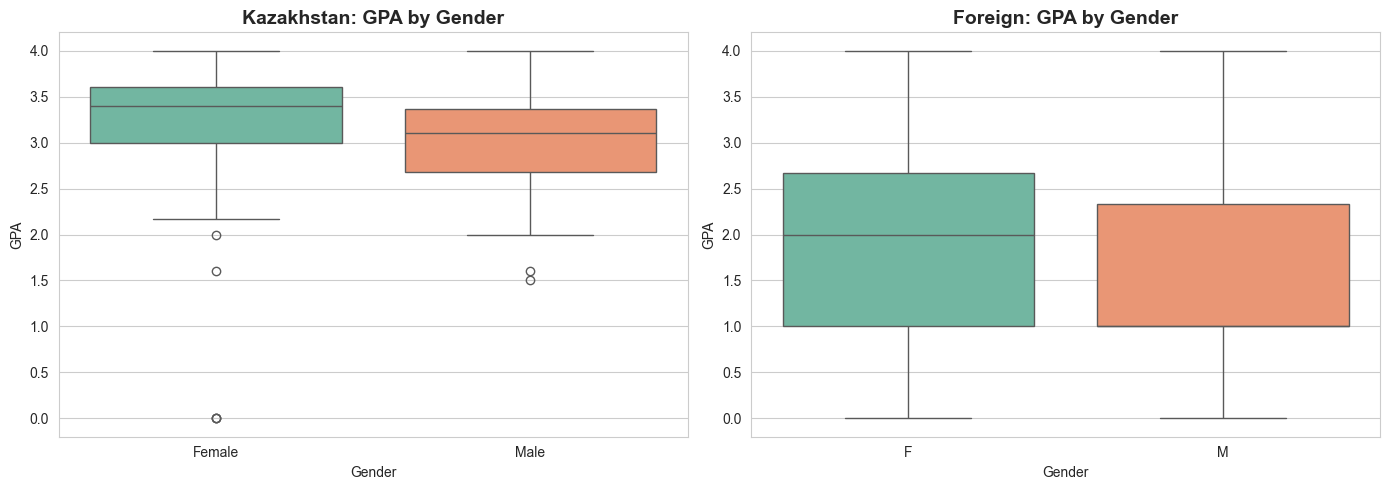

In [17]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Find gender columns
kz_gender_col = None
for col in kz_data.columns:
    if 'gender' in col.lower() or 'sex' in col.lower():
        kz_gender_col = col
        break

foreign_gender_col = None
for col in foreign_data.columns:
    if 'gender' in col.lower() or 'sex' in col.lower():
        foreign_gender_col = col
        break

# Kazakhstan
if kz_gender_col:
    sns.boxplot(data=kz_data, x=kz_gender_col, y='gpa', ax=axes[0], palette='Set2')
    axes[0].set_title('Kazakhstan: GPA by Gender', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Gender')
    axes[0].set_ylabel('GPA')
else:
    axes[0].text(0.5, 0.5, 'Gender data not available', 
                ha='center', va='center', transform=axes[0].transAxes)
    axes[0].set_title('Kazakhstan: GPA by Gender', fontsize=14, fontweight='bold')

# Foreign
if foreign_gender_col:
    sns.boxplot(data=foreign_data, x=foreign_gender_col, y='final_grade', ax=axes[1], palette='Set2')
    axes[1].set_title('Foreign: GPA by Gender', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Gender')
    axes[1].set_ylabel('GPA')
else:
    axes[1].text(0.5, 0.5, 'Gender data not available', 
                ha='center', va='center', transform=axes[1].transAxes)
    axes[1].set_title('Foreign: GPA by Gender', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../results/figures/rq2_gender_gpa.png', dpi=300, bbox_inches='tight')
plt.show()


In [18]:
rq2_results = pd.DataFrame([kz_gender_results, foreign_gender_results])
rq2_results.to_csv('/Users/kassi/Data Mining/Final/Code/report/statistical/rq2_gender.csv', index=False)
print("\n✓ Results saved to: results/tables/rq2_gender.csv")


✓ Results saved to: results/tables/rq2_gender.csv


# RQ3: Living Situation Impact on GPA

In [20]:
print("\n" + "="*70)
print("RQ3: DOES LIVING SITUATION IMPACT GPA?")
print("="*70)

def analyze_living_gpa(data, name):
    """Analyze living situation impact on GPA"""
    
    # Find living situation column
    living_col = None
    for col in data.columns:
        if 'living' in col.lower() or 'residence' in col.lower() or 'housing' in col.lower():
            living_col = col
            break
    
    if not living_col:
        print(f"\n⚠ {name}: Living situation column not found")
        return {
            'Dataset': name,
            'F_Statistic': np.nan,
            'P_Value': np.nan,
            'Significant': False,
            'Interpretation': 'Living situation column not found'
        }
    
    print(f"\n--- {name} ---")
    print(f"Using column: {living_col}")
    
    # Descriptive statistics
    if data is kz_data:
        living_stats = data.groupby(living_col)['gpa'].agg([
            ('Count', 'count'),
            ('Mean', 'mean'),
            ('Std', 'std'),
            ('Min', 'min'),
            ('Max', 'max')
        ]).round(3)
    elif data is foreign_data:
        living_stats = data.groupby(living_col)['final_grade'].agg([
            ('Count', 'count'),
            ('Mean', 'mean'),
            ('Std', 'std'),
            ('Min', 'min'),
            ('Max', 'max')
        ]).round(3)
        
    print(f"\n{name} - GPA Statistics by Living Situation:")
    print(living_stats)
    
    # ANOVA test
    if data is kz_data:
        situations = data[living_col].unique()
        groups = [data[data[living_col] == sit]['gpa'].dropna() 
                for sit in situations]
    elif data is foreign_data:
        situations = data[living_col].unique()
        groups = [data[data[living_col] == sit]['final_grade'].dropna() 
                for sit in situations]
        
    
    # Remove empty groups
    groups = [g for g in groups if len(g) > 0]
    
    if len(groups) >= 2:
        f_stat, p_value = f_oneway(*groups)
        
        print(f"\n--- One-Way ANOVA Results ---")
        print(f"F-statistic: {f_stat:.4f}")
        print(f"P-value: {p_value:.4f}")
        
        if p_value < 0.05:
            print(f"\n✓ CONCLUSION: Significant difference by living situation (p < 0.05)")
        else:
            print(f"\n✗ CONCLUSION: No significant difference by living situation (p >= 0.05)")
        
        return {
            'Dataset': name,
            'F_Statistic': f_stat,
            'P_Value': p_value,
            'Significant': p_value < 0.05,
            'Interpretation': 'Significant difference' if p_value < 0.05 else 'No significant difference'
        }
    
    return {
        'Dataset': name,
        'F_Statistic': np.nan,
        'P_Value': np.nan,
        'Significant': False,
        'Interpretation': 'Insufficient data for ANOVA'
    }

kz_living_results = analyze_living_gpa(kz_data, "Kazakhstan")
foreign_living_results = analyze_living_gpa(foreign_data, "Foreign")


RQ3: DOES LIVING SITUATION IMPACT GPA?

--- Kazakhstan ---
Using column: living_situation

Kazakhstan - GPA Statistics by Living Situation:
                  Count   Mean    Std  Min   Max
living_situation                                
Dormitory            20  2.914  0.927  0.0  4.00
Other                10  3.026  1.113  0.0  4.00
Rented apartment     46  3.115  0.540  1.5  4.00
With parents         45  3.191  0.678  0.0  3.95

--- One-Way ANOVA Results ---
F-statistic: 0.7229
P-value: 0.5403

✗ CONCLUSION: No significant difference by living situation (p >= 0.05)

⚠ Foreign: Living situation column not found


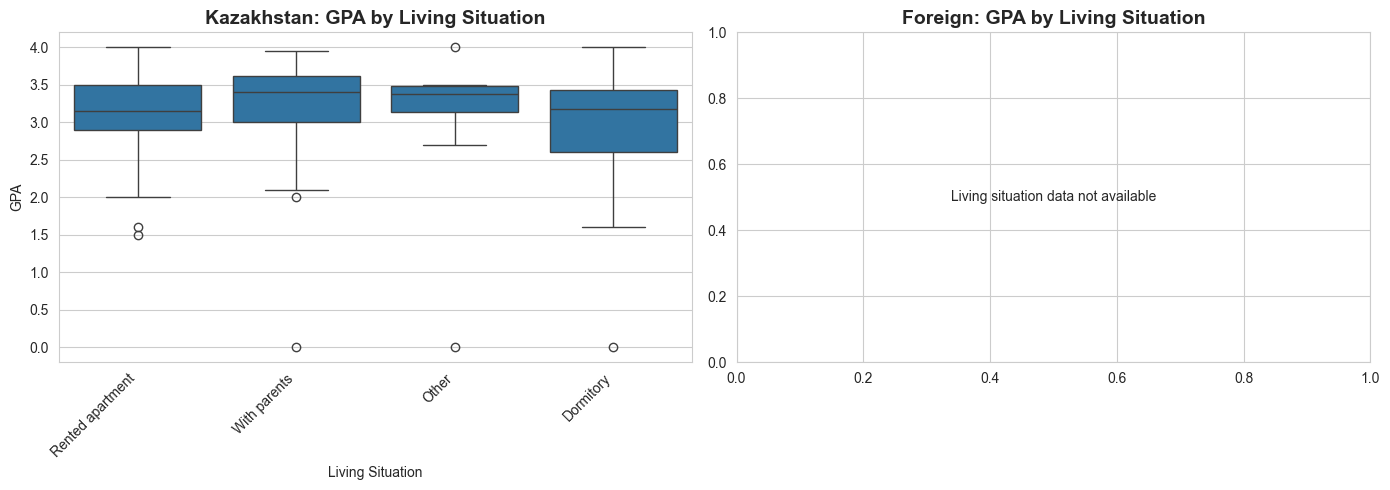

In [21]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Find living columns
kz_living_col = None
for col in kz_data.columns:
    if 'living' in col.lower() or 'residence' in col.lower():
        kz_living_col = col
        break

foreign_living_col = None
for col in foreign_data.columns:
    if 'living' in col.lower() or 'residence' in col.lower():
        foreign_living_col = col
        break

# Kazakhstan
if kz_living_col:
    sns.boxplot(data=kz_data, x=kz_living_col, y='gpa', ax=axes[0])
    axes[0].set_title('Kazakhstan: GPA by Living Situation', 
                      fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Living Situation')
    axes[0].set_ylabel('GPA')
    plt.sca(axes[0])
    plt.xticks(rotation=45, ha='right')
else:
    axes[0].text(0.5, 0.5, 'Living situation data not available', 
                ha='center', va='center', transform=axes[0].transAxes)
    axes[0].set_title('Kazakhstan: GPA by Living Situation', fontsize=14, fontweight='bold')

# Foreign
if foreign_living_col:
    sns.boxplot(data=foreign_data, x=foreign_living_col, y='final_grade', ax=axes[1])
    axes[1].set_title('Foreign: GPA by Living Situation', 
                      fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Living Situation')
    axes[1].set_ylabel('GPA')
    plt.sca(axes[1])
    plt.xticks(rotation=45, ha='right')
else:
    axes[1].text(0.5, 0.5, 'Living situation data not available', 
                ha='center', va='center', transform=axes[1].transAxes)
    axes[1].set_title('Foreign: GPA by Living Situation', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('/Users/kassi/Data Mining/Final/Code/figure/statistical', dpi=300, bbox_inches='tight')
plt.show()

In [22]:
# Save results
rq3_results = pd.DataFrame([kz_living_results, foreign_living_results])
rq3_results.to_csv('/Users/kassi/Data Mining/Final/Code/report/statistical/rq3_living.csv', index=False)
print("\n✓ Results saved to: results/tables/rq3_living.csv")


✓ Results saved to: results/tables/rq3_living.csv


# RQ4: Family Size Effect on GPA

In [24]:
def analyze_family_size_gpa(data, name):
    """Analyze family size correlation with GPA"""
    
    # Найти колонку family_size
    family_col = None
    for col in data.columns:
        if 'family' in col.lower() and ('size' in col.lower() or 'member' in col.lower()):
            family_col = col
            break
    if not family_col:
        for col in data.columns:
            if 'sibling' in col.lower() or 'brother' in col.lower() or 'sister' in col.lower():
                family_col = col
                break
    if not family_col:
        print(f"\n⚠ {name}: Family size column not found")
        return None

    print(f"\n--- {name} ---")
    print(f"Using column: {family_col}")
    
    # Создаем копию и удаляем NaN
    if data is kz_data:
        clean_data = data[[family_col, 'gpa']].dropna()
        y_col = 'gpa'
    elif data is foreign_data:
        clean_data = data[[family_col, 'final_grade']].dropna()
        y_col = 'final_grade'
        
        # Преобразуем категории в числа
        clean_data[family_col] = clean_data[family_col].map({
            'Less than or equal to 3': 3,
            'Greater than 3': 4
        })

    if len(clean_data) < 3:
        print(f"Insufficient data for correlation (n={len(clean_data)})")
        return None
    
    # Корреляции
    pearson_corr, pearson_p = pearsonr(clean_data[family_col], clean_data[y_col])
    spearman_corr, spearman_p = spearmanr(clean_data[family_col], clean_data[y_col])
    
    print(f"\nSample size: n={len(clean_data)}")
    print(f"Pearson Correlation: {pearson_corr:.4f} (p = {pearson_p:.4f})")
    print(f"Spearman Correlation: {spearman_corr:.4f} (p = {spearman_p:.4f})")
    
    if pearson_p < 0.05:
        direction = "positive" if pearson_corr > 0 else "negative"
        print(f"\n✓ CONCLUSION: Significant {direction} correlation (p < 0.05)")
    else:
        print(f"\n✗ CONCLUSION: No significant correlation (p >= 0.05)")
    
    return {
        'Dataset': name,
        'Pearson_Corr': pearson_corr,
        'Pearson_P': pearson_p,
        'Spearman_Corr': spearman_corr,
        'Spearman_P': spearman_p,
        'Significant': pearson_p < 0.05,
        'Interpretation': f"{'Significant' if pearson_p < 0.05 else 'No significant'} correlation"
    }

kz_family_results = analyze_family_size_gpa(kz_data, "Kazakhstan")
foreign_family_results = analyze_family_size_gpa(foreign_data, "Foreign")



--- Kazakhstan ---
Using column: family_size

Sample size: n=121
Pearson Correlation: -0.0217 (p = 0.8130)
Spearman Correlation: -0.0775 (p = 0.3981)

✗ CONCLUSION: No significant correlation (p >= 0.05)

--- Foreign ---
Using column: family_size

Sample size: n=649
Pearson Correlation: -0.0227 (p = 0.5641)
Spearman Correlation: -0.0194 (p = 0.6214)

✗ CONCLUSION: No significant correlation (p >= 0.05)


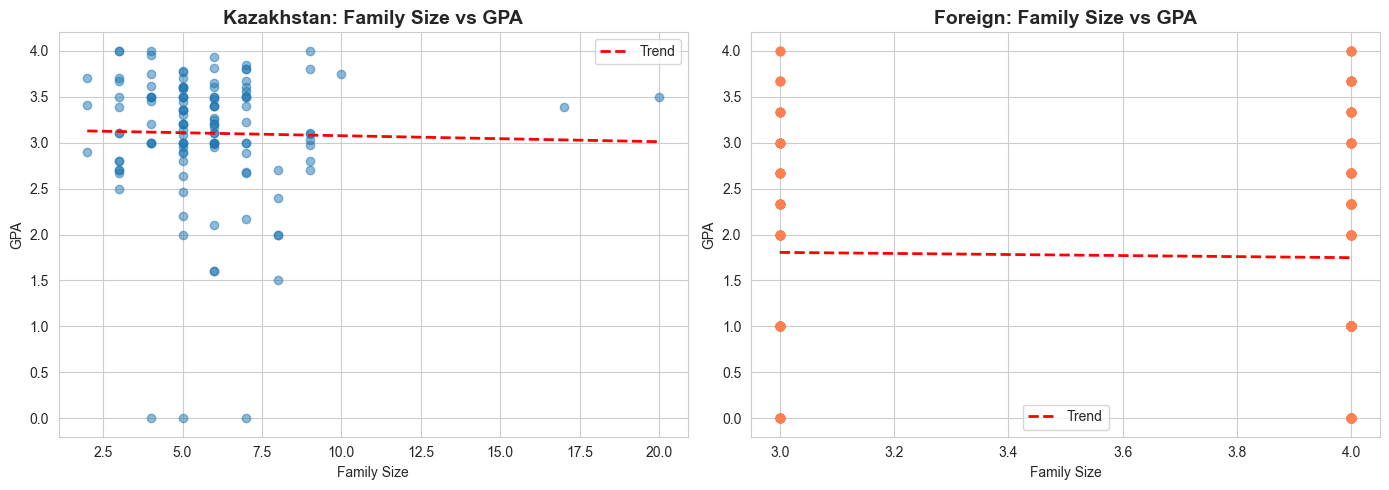

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------
# Visualization: Family Size vs GPA
# -------------------------

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# -------------------------
# Kazakhstan
# -------------------------
kz_family_col = None
for col in kz_data.columns:
    if 'family' in col.lower() and ('size' in col.lower() or 'member' in col.lower()):
        kz_family_col = col
        break

if kz_family_col and kz_family_col in kz_data.columns:
    # Ensure numeric
    kz_family_numeric = pd.to_numeric(kz_data[kz_family_col], errors='coerce')
    axes[0].scatter(kz_family_numeric, kz_data['gpa'], alpha=0.5)
    
    # Trend line
    clean = pd.DataFrame({
        'FamilySize': kz_family_numeric,
        'GPA': kz_data['gpa']
    }).dropna()
    if len(clean) > 1:
        z = np.polyfit(clean['FamilySize'], clean['GPA'], 1)
        p = np.poly1d(z)
        x_line = np.linspace(clean['FamilySize'].min(), clean['FamilySize'].max(), 100)
        axes[0].plot(x_line, p(x_line), "r--", linewidth=2, label='Trend')
    
    axes[0].set_title('Kazakhstan: Family Size vs GPA', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Family Size')
    axes[0].set_ylabel('GPA')
    axes[0].legend()
else:
    axes[0].text(0.5, 0.5, 'Family size data not available', 
                 ha='center', va='center', transform=axes[0].transAxes)
    axes[0].set_title('Kazakhstan: Family Size vs GPA', fontsize=14, fontweight='bold')

# -------------------------
# Foreign
# -------------------------
foreign_family_col = None
for col in foreign_data.columns:
    if 'family' in col.lower() and ('size' in col.lower() or 'member' in col.lower()):
        foreign_family_col = col
        break

if foreign_family_col and foreign_family_col in foreign_data.columns:
    # Преобразуем категориальные значения в числовые
    foreign_family_numeric = foreign_data[foreign_family_col].replace({
        'Less than or equal to 3': 3,
        'Greater than 3': 4
    }).astype(float)
    
    axes[1].scatter(foreign_family_numeric, foreign_data['final_grade'], 
                    alpha=0.5, color='coral')
    
    # Trend line
    clean = pd.DataFrame({
        'FamilySize': foreign_family_numeric,
        'FinalGrade': foreign_data['final_grade']
    }).dropna()
    if len(clean) > 1:
        z = np.polyfit(clean['FamilySize'], clean['FinalGrade'], 1)
        p = np.poly1d(z)
        x_line = np.linspace(clean['FamilySize'].min(), clean['FamilySize'].max(), 100)
        axes[1].plot(x_line, p(x_line), "r--", linewidth=2, label='Trend')
    
    axes[1].set_title('Foreign: Family Size vs GPA', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Family Size')
    axes[1].set_ylabel('GPA')
    axes[1].legend()
else:
    axes[1].text(0.5, 0.5, 'Family size data not available', 
                 ha='center', va='center', transform=axes[1].transAxes)
    axes[1].set_title('Foreign: Family Size vs GPA', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('/Users/kassi/Data Mining/Final/Code/figure/statistical/rq4_family_size_gpa.png', dpi=300, bbox_inches='tight')
plt.show()


In [27]:
# Save results
rq4_results = pd.DataFrame([kz_family_results, foreign_family_results])
rq4_results.to_csv('/Users/kassi/Data Mining/Final/Code/report/statistical/rq4_family_size.csv', index=False)
print("\n✓ Results saved to: results/tables/rq4_family_size.csv")


✓ Results saved to: results/tables/rq4_family_size.csv


# RQ5: Parental Education Influence

In [33]:
# %% RQ5: Parental Education Influence
print("\n" + "="*70)
print("RQ5: DOES PARENTAL EDUCATION INFLUENCE STUDENT PERFORMANCE?")
print("="*70)

def analyze_parental_education_gpa(data, name):
    """Analyze parental education impact on GPA"""
    results = []

    # Определяем целевую колонку с оценкой
    grade_col = 'gpa' if data is kz_data else 'final_grade'

    # Список родителей
    parents = ['father', 'mother']
    
    # Преобразование категориальных уровней образования в числа
    edu_mapping = {
        'None': 0,
        'Primary': 1,
        'Middle': 2,
        'High School': 3,
        'Bachelor': 4,
        'Master': 5,
        'PhD': 6
    }

    for parent in parents:
        parent_col = next((c for c in data.columns if parent in c.lower() and 'edu' in c.lower()), None)
        if parent_col:
            # Преобразуем в числовой тип, если это object
            parent_data = data[parent_col].map(edu_mapping) if data[parent_col].dtype == 'object' else data[parent_col]
            clean = pd.DataFrame({parent_col: parent_data, grade_col: data[grade_col]}).dropna()
            
            if len(clean) >= 3:
                corr, p_val = pearsonr(clean[parent_col], clean[grade_col])
                results.append({
                    'Dataset': name,
                    'Parent': parent.capitalize(),
                    'Correlation': corr,
                    'P_Value': p_val,
                    'Significant': p_val < 0.05,
                    'Interpretation': 'Significant' if p_val < 0.05 else 'Not significant'
                })
            else:
                results.append({
                    'Dataset': name,
                    'Parent': parent.capitalize(),
                    'Correlation': np.nan,
                    'P_Value': np.nan,
                    'Significant': False,
                    'Interpretation': 'Insufficient data'
                })
        else:
            results.append({
                'Dataset': name,
                'Parent': parent.capitalize(),
                'Correlation': np.nan,
                'P_Value': np.nan,
                'Significant': False,
                'Interpretation': 'Column not found'
            })
    return results


# Анализ для обоих датасетов
kz_parent_edu = analyze_parental_education_gpa(kz_data, "Kazakhstan")
foreign_parent_edu = analyze_parental_education_gpa(foreign_data, "Foreign")

# Сохраняем результаты
rq5_results = pd.DataFrame(kz_parent_edu + foreign_parent_edu)
rq5_results.to_csv('/Users/kassi/Data Mining/Final/Code/report/statistical/rq5_parental_education.csv', index=False)
print("\n✓ Results saved to: /Users/kassi/Data Mining/Final/Code/report/statistical/rq5_parental_education.csv")



RQ5: DOES PARENTAL EDUCATION INFLUENCE STUDENT PERFORMANCE?

✓ Results saved to: /Users/kassi/Data Mining/Final/Code/report/statistical/rq5_parental_education.csv


In [35]:
# %% RQ6: Family Income Relation to GPA
print("\n" + "="*70)
print("RQ6: IS FAMILY INCOME RELATED TO ACADEMIC SUCCESS?")
print("="*70)

def analyze_income_gpa(data, name):
    """Analyze family income impact on GPA"""
    income_col = next((c for c in data.columns if 'income' in c.lower() or 'salary' in c.lower() or 'earning' in c.lower()), None)
    if not income_col:
        print(f"\n⚠ {name}: Family income column not found")
        return {
            'Dataset': name,
            'Test': 'N/A',
            'Statistic': np.nan,
            'P_Value': np.nan,
            'Significant': False,
            'Interpretation': 'Income column not found'
        }

    grade_col = 'gpa' if data is kz_data else 'final_grade'
    print(f"\n--- {name} ---")
    print(f"Using column: {income_col}, Grade column: {grade_col}")

    # Попробуем преобразовать доход в число
    if data[income_col].dtype == 'object':
        try:
            data[income_col] = pd.to_numeric(data[income_col].str.replace(',', '').str.extract(r'(\d+\.?\d*)')[0])
        except:
            pass

    # Если после преобразования income числовой, используем Pearson
    if pd.api.types.is_numeric_dtype(data[income_col]) and data[income_col].nunique() > 3:
        clean = data[[income_col, grade_col]].dropna()
        if len(clean) >= 3:
            corr, p_val = pearsonr(clean[income_col], clean[grade_col])
            test_type = 'Pearson'
            stat = corr
        else:
            return {
                'Dataset': name,
                'Test': 'Pearson',
                'Statistic': np.nan,
                'P_Value': np.nan,
                'Significant': False,
                'Interpretation': 'Insufficient data'
            }
    else:
        # Категориальная переменная -> ANOVA
        groups = [data[data[income_col] == val][grade_col].dropna() for val in data[income_col].unique()]
        groups = [g for g in groups if len(g) > 0]
        if len(groups) >= 2:
            stat, p_val = f_oneway(*groups)
            test_type = 'ANOVA'
        else:
            return {
                'Dataset': name,
                'Test': 'ANOVA',
                'Statistic': np.nan,
                'P_Value': np.nan,
                'Significant': False,
                'Interpretation': 'Insufficient data'
            }

    return {
        'Dataset': name,
        'Test': test_type,
        'Statistic': stat,
        'P_Value': p_val,
        'Significant': p_val < 0.05,
        'Interpretation': 'Significant' if p_val < 0.05 else 'Not significant'
    }


kz_income_results = analyze_income_gpa(kz_data, "Kazakhstan")
foreign_income_results = analyze_income_gpa(foreign_data, "Foreign")

# Save results
rq6_results = pd.DataFrame([kz_income_results, foreign_income_results])
rq6_results.to_csv('/Users/kassi/Data Mining/Final/Code/report/statistical/rq6_family_income.csv', index=False)
print("\n✓ Results saved to: results/tables/rq6_family_income.csv")


RQ6: IS FAMILY INCOME RELATED TO ACADEMIC SUCCESS?

--- Kazakhstan ---
Using column: family_income, Grade column: gpa

⚠ Foreign: Family income column not found

✓ Results saved to: results/tables/rq6_family_income.csv


In [38]:
# %% RQ7: Financial Support vs GPA
print("\n" + "="*70)
print("RQ7: DOES FINANCIAL SUPPORT INFLUENCE GPA?")
print("="*70)

def analyze_financial_support_gpa(data, name):
    """Analyze effect of financial support on GPA using ANOVA"""
    # Ищем колонку с финансовой поддержкой
    support_col = next((c for c in data.columns if 'support' in c.lower() or 'scholarship' in c.lower() or 'grant' in c.lower()), None)

    if not support_col:
        print(f"\n⚠ {name}: Financial support column not found")
        return {
            'Dataset': name,
            'Test': 'N/A',
            'Statistic': np.nan,
            'P_Value': np.nan,
            'Significant': False,
            'Interpretation': 'Financial support column not found'
        }

    print(f"\n--- {name} ---")
    print(f"Using column: {support_col}")

    # Предполагаем категориальную переменную -> ANOVA
    
    GPA = 'gpa' if data is kz_data else 'final_grade' 
    groups = [data[data[support_col] == val][GPA].dropna() for val in data[support_col].unique()]
    groups = [g for g in groups if len(g) > 0]

    if len(groups) >= 2:
        f_stat, p_val = f_oneway(*groups)
        result = {
            'Dataset': name,
            'Test': 'ANOVA',
            'Statistic': f_stat,
            'P_Value': p_val,
            'Significant': p_val < 0.05,
            'Interpretation': 'Significant' if p_val < 0.05 else 'Not significant'
        }
    else:
        result = {
            'Dataset': name,
            'Test': 'ANOVA',
            'Statistic': np.nan,
            'P_Value': np.nan,
            'Significant': False,
            'Interpretation': 'Insufficient data'
        }

    return result

# Анализ для обоих датасетов
kz_support_results = analyze_financial_support_gpa(kz_data, "Kazakhstan")
foreign_support_results = analyze_financial_support_gpa(foreign_data, "Foreign")

# Сохраняем результаты
rq7_results = pd.DataFrame([kz_support_results, foreign_support_results])
rq7_results.to_csv('/Users/kassi/Data Mining/Final/Code/report/statistical/rq7_financial_support.csv', index=False)
print("\n✓ Results saved to: results/tables/rq7_financial_support.csv")



RQ7: DOES FINANCIAL SUPPORT INFLUENCE GPA?

--- Kazakhstan ---
Using column: financial_support

--- Foreign ---
Using column: school_support

✓ Results saved to: results/tables/rq7_financial_support.csv
